In [1]:
import pandas as pd
import numpy as np

In [2]:
from araxia.network import MLP
from araxia.preprocessing import create_lagged_dataset
from araxia.train import normalize_features, normalize_targets, NormalizeFeatures
from araxia.utils import train_test_split

In [3]:
from atrax import Atrax as tx

In [4]:
df = tx.read_csv('sales.csv')

In [ ]:
#df.info()

In [5]:
df.head()

sale_date,sales
2024-02-22,26794.409999999712
2024-02-23,32036.07999999969
2024-02-24,27247.96999999973
2024-02-25,32901.659999999705
2024-02-26,24476.209999999744


In [6]:
df.loc[1]

sale_date,sales
2024-02-23,32036.07999999969


In [7]:
X_raw, y_raw = create_lagged_dataset(df, 'sale_date', 'sales', lag=5)

In [8]:
type(X_raw)

numpy.ndarray

In [9]:
X_raw

array([[2.679441e+04, 3.203608e+04, 2.724797e+04, ..., 2.700000e+01,
        2.000000e+00, 0.000000e+00],
       [3.203608e+04, 2.724797e+04, 3.290166e+04, ..., 2.800000e+01,
        2.000000e+00, 0.000000e+00],
       [2.724797e+04, 3.290166e+04, 2.447621e+04, ..., 2.900000e+01,
        2.000000e+00, 0.000000e+00],
       ...,
       [3.257513e+04, 3.453418e+04, 2.476328e+04, ..., 1.900000e+01,
        6.000000e+00, 0.000000e+00],
       [3.453418e+04, 2.476328e+04, 3.651275e+04, ..., 2.000000e+01,
        6.000000e+00, 0.000000e+00],
       [2.476328e+04, 3.651275e+04, 2.471918e+04, ..., 2.100000e+01,
        6.000000e+00, 1.000000e+00]], shape=(479, 9))

In [10]:
type(X_raw)

numpy.ndarray

In [11]:
nf = NormalizeFeatures(X_raw)
X_norm = nf.normalize()

In [12]:
X_norm.shape

(479, 9)

In [13]:
type(X_norm)

numpy.ndarray

In [14]:
X_norm

array([[-6.80148988e-01,  1.74598990e-01, -6.05846461e-01, ...,
         1.29187827e+00, -1.24754715e+00, -6.32917684e-01],
       [ 1.77986485e-01, -6.08986412e-01,  3.18416611e-01, ...,
         1.40548386e+00, -1.24754715e+00, -6.32917684e-01],
       [-6.05894805e-01,  3.16253182e-01, -1.05897272e+00, ...,
         1.51908946e+00, -1.24754715e+00, -6.32917684e-01],
       ...,
       [ 2.66236590e-01,  5.83418899e-01, -1.01204263e+00, ...,
         3.83033486e-01,  1.30360204e-03, -6.32917684e-01],
       [ 5.86960767e-01, -1.01561174e+00,  9.08756219e-01, ...,
         4.96639084e-01,  1.30360204e-03, -6.32917684e-01],
       [-1.01267368e+00,  9.07216508e-01, -1.01925208e+00, ...,
         6.10244681e-01,  1.30360204e-03,  1.57998429e+00]],
      shape=(479, 9))

In [ ]:
#X_norm, X_mean, X_std = normalize_features(X_raw)

In [15]:
y_norm = normalize_targets(y_raw)
#

In [16]:
len(y_norm)

479

In [17]:
X_train, y_train, X_test, y_test = train_test_split(X_norm, y_norm, test_size=0.2)

In [18]:
mlp = MLP(input_size=5, hidden_size=10, learning_rate=0.001)
mlp.train(X_train, y_train, epochs=300)

epoch: 0, | loss: 0.022941
epoch: 10, | loss: 0.009057
epoch: 20, | loss: 0.008981
epoch: 30, | loss: 0.008919
epoch: 40, | loss: 0.008869
epoch: 50, | loss: 0.008827
epoch: 60, | loss: 0.008793
epoch: 70, | loss: 0.008765
epoch: 80, | loss: 0.008741
epoch: 90, | loss: 0.008722
epoch: 100, | loss: 0.008706
epoch: 110, | loss: 0.008693
epoch: 120, | loss: 0.008682
epoch: 130, | loss: 0.008673
epoch: 140, | loss: 0.008666
epoch: 150, | loss: 0.008660
epoch: 160, | loss: 0.008655
epoch: 170, | loss: 0.008650
epoch: 180, | loss: 0.008647
epoch: 190, | loss: 0.008644
epoch: 200, | loss: 0.008641
epoch: 210, | loss: 0.008639
epoch: 220, | loss: 0.008637
epoch: 230, | loss: 0.008635
epoch: 240, | loss: 0.008634
epoch: 250, | loss: 0.008633
epoch: 260, | loss: 0.008631
epoch: 270, | loss: 0.008630
epoch: 280, | loss: 0.008629
epoch: 290, | loss: 0.008628


#### test the model

In [19]:
len(X_train)

383

In [20]:
X_train

array([[-0.68014899,  0.17459899, -0.60584646, ...,  1.29187827,
        -1.24754715, -0.63291768],
       [ 0.17798648, -0.60898641,  0.31841661, ...,  1.40548386,
        -1.24754715, -0.63291768],
       [-0.6058948 ,  0.31625318, -1.05897272, ...,  1.51908946,
        -1.24754715, -0.63291768],
       ...,
       [ 0.44490929,  0.12925093, -0.61460897, ..., -0.2986001 ,
        -0.93533446, -0.63291768],
       [ 0.1326213 , -0.61775818,  1.16195835, ..., -0.1849945 ,
        -0.93533446, -0.63291768],
       [-0.61466988,  1.16068616, -1.09855114, ..., -0.0713889 ,
        -0.93533446,  1.57998429]], shape=(383, 9))

In [21]:
len(X_test)

96

In [22]:
X_test

array([[ 1.16444601e+00, -1.10221165e+00, -8.47464430e-01,
         8.19856199e-01, -2.41251324e-01,  1.50366137e+00,
         4.22166938e-02, -9.35334465e-01,  1.57998429e+00],
       [-1.09930629e+00, -8.50859660e-01,  8.19640211e-01,
        -2.41597181e-01, -1.28103581e-01, -1.49948163e+00,
         1.55822291e-01, -9.35334465e-01, -6.32917684e-01],
       [-8.47859386e-01,  8.18006344e-01, -2.42238368e-01,
        -1.28459025e-01, -6.69174473e-01, -9.98957795e-01,
         2.69427889e-01, -9.35334465e-01, -6.32917684e-01],
       [ 8.21636795e-01, -2.44994152e-01, -1.29054891e-01,
        -6.69484075e-01,  3.35982916e-01, -4.98433962e-01,
         3.83033486e-01, -9.35334465e-01, -6.32917684e-01],
       [-2.41765099e-01, -1.31691092e-01, -6.70296665e-01,
         3.35588153e-01, -1.16750567e+00,  2.08986986e-03,
         4.96639084e-01, -9.35334465e-01, -6.32917684e-01],
       [-1.28419254e-01, -6.73504710e-01,  3.35178176e-01,
        -1.16777305e+00, -9.34200761e-01,  5.026137

In [23]:
y_preds = mlp.predict(X_test)



In [25]:
y_preds

[np.float64(0.42222736756921625),
 np.float64(0.45895102019692197),
 np.float64(0.4547903062552024),
 np.float64(0.4535218394440095),
 np.float64(0.4340699180625676),
 np.float64(0.45422442611816677),
 np.float64(0.4502592944995278),
 np.float64(0.4386100361159694),
 np.float64(0.4430414616203284),
 np.float64(0.4482661665417879),
 np.float64(0.4614833559747301),
 np.float64(0.43106244851335807),
 np.float64(0.4575878394351252),
 np.float64(0.44799702142821957),
 np.float64(0.4456438312266338),
 np.float64(0.442153381235643),
 np.float64(0.443858995980907),
 np.float64(0.47312656982017415),
 np.float64(0.4290587564943886),
 np.float64(0.4578525593155865),
 np.float64(0.468979267324825),
 np.float64(0.4370797575459483),
 np.float64(0.4610373956601139),
 np.float64(0.4567662477670259),
 np.float64(0.4579469759783582),
 np.float64(0.43564636293632175),
 np.float64(0.4636064978741244),
 np.float64(0.4600170548477769),
 np.float64(0.4381035133528165),
 np.float64(0.44062352899478063),
 np.f

In [26]:
type(y_test)

list

In [77]:
len(y_test)

96

## testing

In [29]:
y_min = y_raw.min()
y_max = y_raw.max()


In [30]:
y_pred_denormalized = [pred * (y_max- y_min) + y_min for pred in y_preds]

In [31]:
y_pred_denormalized

[np.float64(28903.9439277471),
 np.float64(31387.192911594317),
 np.float64(31105.845934140903),
 np.float64(31020.072360584054),
 np.float64(29704.735771001484),
 np.float64(31067.58118718017),
 np.float64(30799.45946294359),
 np.float64(30011.738008958353),
 np.float64(30311.39046979206),
 np.float64(30664.68438961657),
 np.float64(31558.429153009416),
 np.float64(29501.371040980273),
 np.float64(31295.01479206331),
 np.float64(30646.48482933449),
 np.float64(30487.36239028608),
 np.float64(30251.338580749278),
 np.float64(30366.672045150262),
 np.float64(32345.7418760527),
 np.float64(29365.8816271006),
 np.float64(31312.915118613717),
 np.float64(32065.301778993482),
 np.float64(29908.26075568695),
 np.float64(31528.273370050305),
 np.float64(31239.458862057432),
 np.float64(31319.29956202034),
 np.float64(29811.334784191356),
 np.float64(31701.995753469433),
 np.float64(31459.27804676097),
 np.float64(29977.487000496687),
 np.float64(30147.890155804427),
 np.float64(31966.38994477

In [37]:
n = X_norm.shape[0]
stop = int(n - (n * .2))
stop

383

In [70]:
len(X_norm)

479

In [71]:
479-383


96

In [44]:
type(df)

atrax.core.dataset.DataSet

In [46]:
df.head()

sale_date,sales,day_of_week,is_weekend,day_of_month,month
2024-02-22 00:00:00,26794.409999999712,3,False,22,2
2024-02-23 00:00:00,32036.07999999969,4,False,23,2
2024-02-24 00:00:00,27247.96999999973,5,True,24,2
2024-02-25 00:00:00,32901.659999999705,6,True,25,2
2024-02-26 00:00:00,24476.209999999744,0,False,26,2


In [ ]:
#test_dates = df.iloc[stop:, :1]

In [72]:
test_dates = [d.strftime('%m/%d/%Y') for d in df.iloc[stop+5:, :1]['sale_date'].to_list()]

In [86]:
test_values = df.iloc[stop+5:, :2]['sales'].to_list()

In [73]:
type(test_dates)

list

In [74]:
len(test_dates)

96

In [75]:
import matplotlib.pyplot as plt

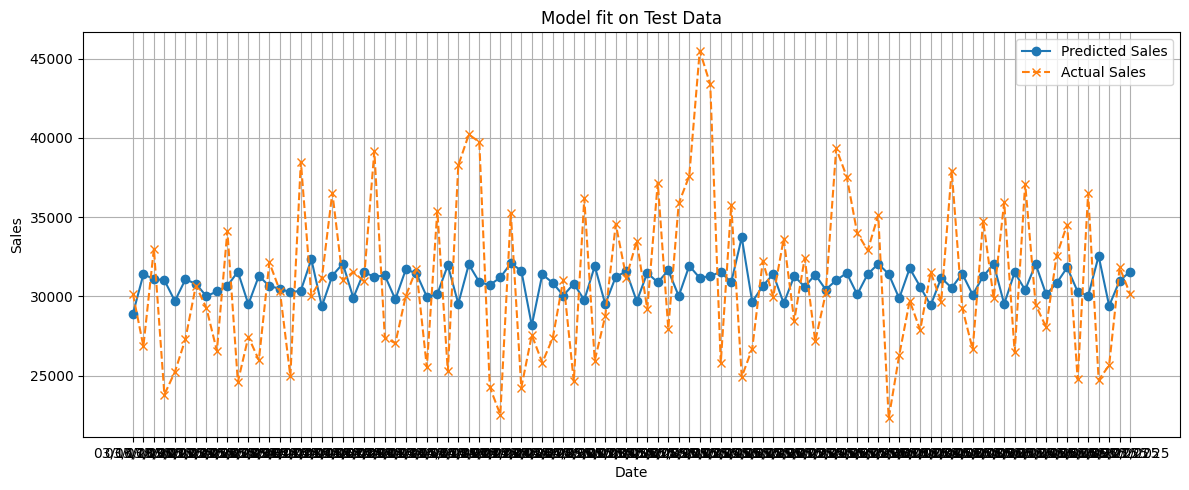

In [87]:
plt.figure(figsize=(12,5))
plt.plot(test_dates, y_pred_denormalized, label='Predicted Sales', marker='o', linestyle='-')
plt.plot(test_dates, test_values, label='Actual Sales', marker='x', linestyle='--')
plt.title('Model fit on Test Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### forecasting

In [18]:
future_steps = 10
X_future = list(X_norm[-1])

In [19]:
X_future

[np.float64(-1.0126736804032022),
 np.float64(0.9072165076058272),
 np.float64(-1.019252080579924),
 np.float64(-0.8657264999466037),
 np.float64(0.1437556312897925),
 np.float64(1.00313753451416),
 np.float64(0.6102446811489333),
 np.float64(0.001303602041443381),
 np.float64(1.579984292631889)]

In [20]:
type(X_future)

list

In [22]:
X_test

array([[ 1.16444601e+00, -1.10221165e+00, -8.47464430e-01,
         8.19856199e-01, -2.41251324e-01,  1.50366137e+00,
         4.22166938e-02, -9.35334465e-01,  1.57998429e+00],
       [-1.09930629e+00, -8.50859660e-01,  8.19640211e-01,
        -2.41597181e-01, -1.28103581e-01, -1.49948163e+00,
         1.55822291e-01, -9.35334465e-01, -6.32917684e-01],
       [-8.47859386e-01,  8.18006344e-01, -2.42238368e-01,
        -1.28459025e-01, -6.69174473e-01, -9.98957795e-01,
         2.69427889e-01, -9.35334465e-01, -6.32917684e-01],
       [ 8.21636795e-01, -2.44994152e-01, -1.29054891e-01,
        -6.69484075e-01,  3.35982916e-01, -4.98433962e-01,
         3.83033486e-01, -9.35334465e-01, -6.32917684e-01],
       [-2.41765099e-01, -1.31691092e-01, -6.70296665e-01,
         3.35588153e-01, -1.16750567e+00,  2.08986986e-03,
         4.96639084e-01, -9.35334465e-01, -6.32917684e-01],
       [-1.28419254e-01, -6.73504710e-01,  3.35178176e-01,
        -1.16777305e+00, -9.34200761e-01,  5.026137